In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [6]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 312MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.3MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten

In [9]:
train_ds = keras.utils.image_dataset_from_directory(directory ='/content/train',
                                                    labels = "inferred",
                                                    label_mode ='int',
                                                    batch_size=32,
                                                    image_size=(256,256))

validation_ds = keras.utils.image_dataset_from_directory(directory = '/content/test',
                                                         labels ="inferred",
                                                         label_mode = 'int',
                                                         batch_size=32,
                                                         image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [11]:
def process(image, label):
    # Convert to float32 and normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing to datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs =10, validation_data= validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 506ms/step - accuracy: 0.5790 - loss: 0.6839 - val_accuracy: 0.7350 - val_loss: 0.5492
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 505ms/step - accuracy: 0.7025 - loss: 0.5667 - val_accuracy: 0.7350 - val_loss: 0.5311
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 502ms/step - accuracy: 0.7488 - loss: 0.5111 - val_accuracy: 0.7684 - val_loss: 0.4711
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 502ms/step - accuracy: 0.7742 - loss: 0.4692 - val_accuracy: 0.8134 - val_loss: 0.4156
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 318s 496ms/step - accuracy: 0.7925 - loss: 0.4469 - val_accuracy: 0.8102 - val_loss: 0.4198
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 496ms/step - accuracy: 0.8082 - loss: 0.4227 - val_accuracy: 0.8350 - val_loss: 0.3730
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 502ms/step - accuracy: 0.8215 - loss: 0.4004 - val_accuracy: 0.8358 - val_loss: 0.3645
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 501ms/step - accuracy: 0.8344 -

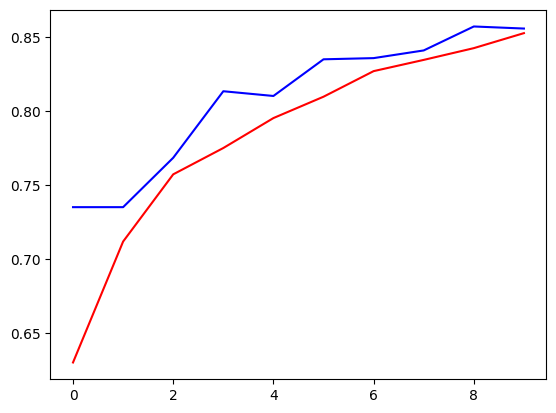

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color ='r', label='Train')
plt.plot(history.history['val_accuracy'], color ='b', label='Validation')

In [18]:
    from google.colab import files
    files.download('CATDOG.zip')

FileNotFoundError: Cannot find file: CATDOG.zip